In [1]:
from __future__ import division
import cv2
import os
import time
import warnings
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from scipy.signal import gaussian
import scipy.ndimage as ndi

from skimage import io,util
from scipy.signal import wiener
from skimage import io
from skimage import transform
from skimage.transform import rotate 
from skimage import exposure
from scipy import ndimage
from butterworth import Butter
from scipy.signal import butter, lfilter

warnings.filterwarnings('ignore')

In [2]:
# establish a folder named LAB4
path = "LAB7"
if not os.path.isdir(path):
    os.mkdir(path)

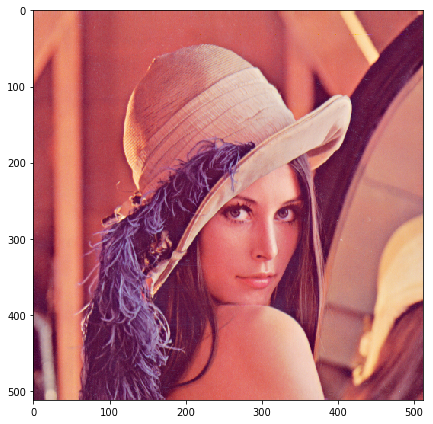

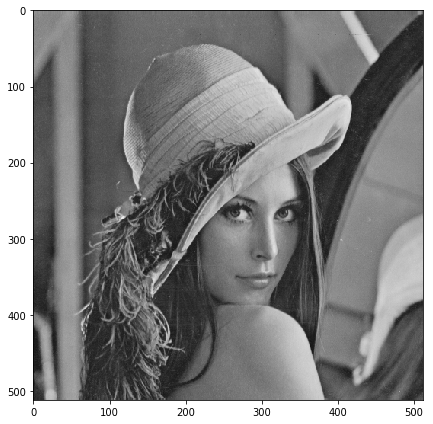

In [3]:
# show the RGB picture
imgRGB = io.imread('lena.png')
plt.figure(figsize=(15,6)) 
io.imshow(imgRGB)
io.imsave('LAB7/lenaRGB.jpg', imgRGB)

# show the gray picture
imgGray = cv2.cvtColor(imgRGB,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,6)) 
io.imshow(imgGray, cmap = 'gray')
io.imsave('LAB7/lenaGray.jpg', imgGray)

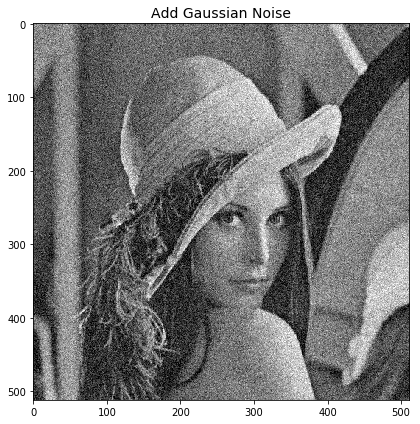

In [4]:
# Add Gaussian Noise
imgGaussianNoise = util.noise.random_noise(imgGray,mode ='gaussian')

plt.figure(figsize=(15,6))
plt.title("Add Gaussian Noise",fontsize = "14")
io.imshow(imgGaussianNoise,cmap='gray')

Runtime of Not Using FFT Algorithm in Wiener Filter : 0.05702352523803711 s


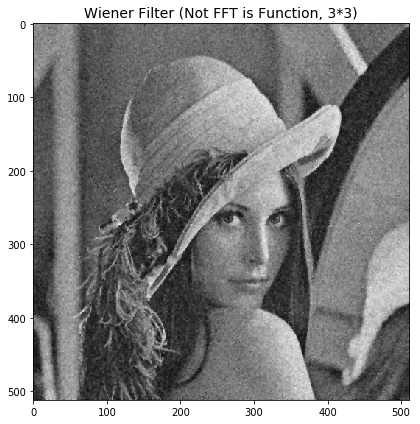

In [5]:
# Use Function to do the Wiener, and calculate the runtime
timeStart = time.time()
imgWiener   = wiener(imgGaussianNoise,[3,3])
timeEnd = time.time()

print("Runtime of Not Using FFT Algorithm in Wiener Filter :",timeEnd - timeStart,"s")

# Plot
plt.figure(figsize=(15,6))
plt.title("Wiener Filter (Not FFT is Function, 3*3)",fontsize = "14")
io.imshow(imgWiener,cmap='gray')
plt.show()

In [6]:
# Use FFT to do the Wiener, and calculate the runtime
timeStart = time.time()

# Make a Frequency Domain image
fftImg = np.fft.fft2(imgGaussianNoise)
fftshiftImg = np.fft.fftshift(fftImg)
fftShiftImg = exposure.rescale_intensity(np.log(1+abs(fftshiftImg)),out_range=(0.0, 1.0))

# Do fourier transform to this image
# From : (https://github.com/tranleanh/Wiener-Filter-image-restoration/blob/master/Wiener%20Filter.ipynb)
kernel_size = 3
K = 30.0

kernel = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
kernel = np.dot(kernel, kernel.transpose())
kernel /= np.sum(kernel)
kernel /= np.sum(kernel)
kernel = np.fft.fft2(kernel, s = imgGray.shape)
cutRange = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
FourierImg = fftImg*cutRange

# Get this program runtime
timeEnd = time.time()
print("Runtime of Using FFT Algorithm in Wiener Filter :",timeEnd - timeStart,"s")

Runtime of Using FFT Algorithm in Wiener Filter : 0.049021244049072266 s


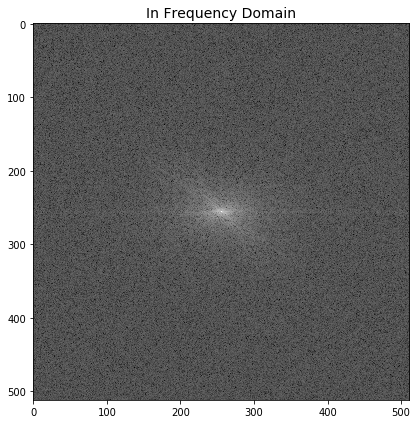

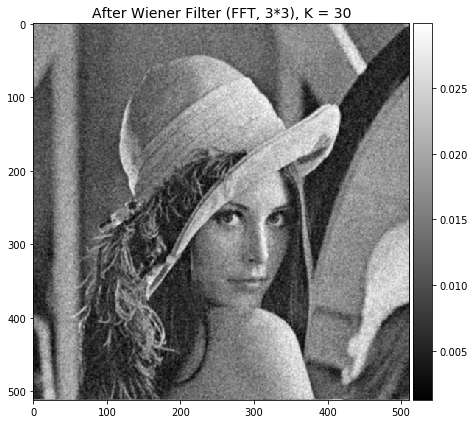

In [7]:
# Plot
plt.figure(figsize=(12,6)) 
plt.title("In Frequency Domain",fontsize = "14")
io.imshow(fftShiftImg)
plt.show()

plt.figure(figsize=(15,6)) 
plt.title("After Wiener Filter (FFT, 3*3), K = 30",fontsize = "14")
io.imshow(np.abs(np.fft.ifft2(FourierImg)), cmap='gray')
plt.show()